In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('car_sales.csv')
df

,BRAND,AUTOGROUP,Q1 Sales,Q2 Sales,Q3 Sales,Q4 Sales,Last Year Sales
0,Toyota,Group A,12000,13000,12500,14000,45000
1,Ford,Group B,9500,10000,10500,9800,42000
2,BMW,Group A,7000,7200,7100,7500,27000
3,Hyundai,Group B,11000,11500,10800,11300,43000
4,Honda,Group A,10200,9800,10000,9700,40000
5,Chevrolet,Group C,8800,8900,8500,8700,36000
6,Kia,Group B,7600,8000,7800,7900,31000
7,Nissan,Group C,9400,9700,9500,9600,39000


In [4]:
df.dtypes.to_frame()

,0
BRAND,object
AUTOGROUP,object
Q1 Sales,int64
Q2 Sales,int64
Q3 Sales,int64
Q4 Sales,int64
Last Year Sales,int64


In [5]:
df.describe()

,Q1 Sales,Q2 Sales,Q3 Sales,Q4 Sales,Last Year Sales
count,8.000000,8.000000,8.000000,8.00000,8.000000
mean,9437.500000,9762.500000,9587.500000,9812.50000,37875.000000
std,1661.271028,1850.820281,1753.720535,2071.87803,6197.637799
min,7000.000000,7200.000000,7100.000000,7500.00000,27000.000000
25%,8500.000000,8675.000000,8325.000000,8500.00000,34750.000000
50%,9450.000000,9750.000000,9750.000000,9650.00000,39500.000000
75%,10400.000000,10375.000000,10575.000000,10175.00000,42250.000000
max,12000.000000,13000.000000,12500.000000,14000.00000,45000.000000


In [6]:
df.size

56

In [7]:
df.shape

(8, 7)

In [8]:
df.describe(include =['object']) #describe with string

,BRAND,AUTOGROUP
count,8,8
unique,8,3
top,Toyota,Group A
freq,1,3


In [9]:
df.head(4)

,BRAND,AUTOGROUP,Q1 Sales,Q2 Sales,Q3 Sales,Q4 Sales,Last Year Sales
0,Toyota,Group A,12000,13000,12500,14000,45000
1,Ford,Group B,9500,10000,10500,9800,42000
2,BMW,Group A,7000,7200,7100,7500,27000
3,Hyundai,Group B,11000,11500,10800,11300,43000


In [10]:
df.sample(1)

,BRAND,AUTOGROUP,Q1 Sales,Q2 Sales,Q3 Sales,Q4 Sales,Last Year Sales
5,Chevrolet,Group C,8800,8900,8500,8700,36000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   BRAND            8 non-null      object
 1   AUTOGROUP        8 non-null      object
 2   Q1 Sales         8 non-null      int64 
 3   Q2 Sales         8 non-null      int64 
 4   Q3 Sales         8 non-null      int64 
 5   Q4 Sales         8 non-null      int64 
 6   Last Year Sales  8 non-null      int64 
dtypes: int64(5), object(2)
memory usage: 580.0+ bytes


In [33]:
df.loc[df['Avg Quarterly Sales'].idxmin()].to_frame()

,2
BRAND,BMW
AUTOGROUP,Group A
Q1 Sales,7000
Q2 Sales,7200
Q3 Sales,7100
Q4 Sales,7500
Last Year Sales,27000
Avg Quarterly Sales,7200.0


In [31]:
print(df.columns)

Index(['BRAND', 'AUTOGROUP', 'Q1 Sales', 'Q2 Sales', 'Q3 Sales', 'Q4 Sales',
       'Last Year Sales', 'Avg Quarterly Sales'],
      dtype='object')


In [21]:
df['Avg Quarterly Sales'] = df[['Q1 Sales'
,'Q2 Sales'
,'Q3 Sales'
,'Q4 Sales']].mean(axis =1).to_frame()
df


,BRAND,AUTOGROUP,Q1 Sales,Q2 Sales,Q3 Sales,Q4 Sales,Last Year Sales,Avg Quarterly Sales
0,Toyota,Group A,12000,13000,12500,14000,45000,12875.0
1,Ford,Group B,9500,10000,10500,9800,42000,9950.0
2,BMW,Group A,7000,7200,7100,7500,27000,7200.0
3,Hyundai,Group B,11000,11500,10800,11300,43000,11150.0
4,Honda,Group A,10200,9800,10000,9700,40000,9925.0
5,Chevrolet,Group C,8800,8900,8500,8700,36000,8725.0
6,Kia,Group B,7600,8000,7800,7900,31000,7825.0
7,Nissan,Group C,9400,9700,9500,9600,39000,9550.0


In [34]:
# Sorting the data in a descending order
df.sort_values(by = 'Avg Quarterly Sales', ascending = False).head(3)

,BRAND,AUTOGROUP,Q1 Sales,Q2 Sales,Q3 Sales,Q4 Sales,Last Year Sales,Avg Quarterly Sales
0,Toyota,Group A,12000,13000,12500,14000,45000,12875.0
3,Hyundai,Group B,11000,11500,10800,11300,43000,11150.0
1,Ford,Group B,9500,10000,10500,9800,42000,9950.0


In [35]:
# avg values for quarters
df[['Q1 Sales'
,'Q2 Sales'
,'Q3 Sales'
,'Q4 Sales']].mean().to_frame()

,0
Q1 Sales,9437.5
Q2 Sales,9762.5
Q3 Sales,9587.5
Q4 Sales,9812.5


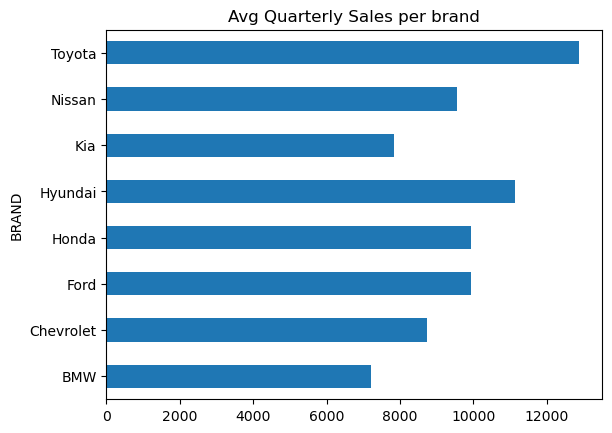

In [38]:
# bar chart
import matplotlib.pyplot as plt

df.groupby('BRAND')['Avg Quarterly Sales'].sum().plot(kind = 'barh')
plt.title('Avg Quarterly Sales per brand')
plt.show()

In [40]:
# % of contripution of each quarters

quarters = ['Q1 Sales','Q2 Sales', 'Q3 Sales', 'Q4 Sales']

for i in quarters:
    df[f"{i} %"] = (df[i] / df['Avg Quarterly Sales']) * 100

print(df[quarters + [f"{i} %" for i in quarters]])

   Q1 Sales  Q2 Sales  Q3 Sales  Q4 Sales  Q1 Sales %  Q2 Sales %  Q3 Sales %  \
0     12000     13000     12500     14000   93.203883  100.970874   97.087379   
1      9500     10000     10500      9800   95.477387  100.502513  105.527638   
2      7000      7200      7100      7500   97.222222  100.000000   98.611111   
3     11000     11500     10800     11300   98.654709  103.139013   96.860987   
4     10200      9800     10000      9700  102.770781   98.740554  100.755668   
5      8800      8900      8500      8700  100.859599  102.005731   97.421203   
6      7600      8000      7800      7900   97.124601  102.236422   99.680511   
7      9400      9700      9500      9600   98.429319  101.570681   99.476440   

   Q4 Sales %  
0  108.737864  
1   98.492462  
2  104.166667  
3  101.345291  
4   97.732997  
5   99.713467  
6  100.958466  
7  100.523560  


In [41]:
# Creating pivot table

df.pivot_table(index = 'BRAND',
               values = quarters,
               aggfunc = 'sum')

,Q1 Sales,Q2 Sales,Q3 Sales,Q4 Sales
BRAND,,,,
BMW,7000,7200,7100,7500
Chevrolet,8800,8900,8500,8700
Ford,9500,10000,10500,9800
Honda,10200,9800,10000,9700
Hyundai,11000,11500,10800,11300
Kia,7600,8000,7800,7900
Nissan,9400,9700,9500,9600
Toyota,12000,13000,12500,14000


In [44]:
# Renaming the column

df.rename(columns = {'Q1 Sales' : 'Quarter 1',
                     'Q2 Sales' : 'Quarter 2',
                     'Q3 Sales' : 'Quarter 3',
                     'Q4 Sales' : 'Quarter 4'},inplace = True)

In [45]:
df

,BRAND,AUTOGROUP,Quarter 1,Quarter 2,Quarter 3,Quarter 4,Last Year Sales,Avg Quarterly Sales,Q1 Sales %,Q2 Sales %,Q3 Sales %,Q4 Sales %
0,Toyota,Group A,12000,13000,12500,14000,45000,12875.0,93.203883,100.970874,97.087379,108.737864
1,Ford,Group B,9500,10000,10500,9800,42000,9950.0,95.477387,100.502513,105.527638,98.492462
2,BMW,Group A,7000,7200,7100,7500,27000,7200.0,97.222222,100.000000,98.611111,104.166667
3,Hyundai,Group B,11000,11500,10800,11300,43000,11150.0,98.654709,103.139013,96.860987,101.345291
4,Honda,Group A,10200,9800,10000,9700,40000,9925.0,102.770781,98.740554,100.755668,97.732997
5,Chevrolet,Group C,8800,8900,8500,8700,36000,8725.0,100.859599,102.005731,97.421203,99.713467
6,Kia,Group B,7600,8000,7800,7900,31000,7825.0,97.124601,102.236422,99.680511,100.958466
7,Nissan,Group C,9400,9700,9500,9600,39000,9550.0,98.429319,101.570681,99.476440,100.523560


In [ ]:
df['YoY Growth %'] = ((df['Total Sales'] - df['Last Year Sales']) / df['Last Year Sales']) *100

In [46]:
df

,BRAND,AUTOGROUP,Quarter 1,Quarter 2,Quarter 3,Quarter 4,Last Year Sales,Avg Quarterly Sales,Q1 Sales %,Q2 Sales %,Q3 Sales %,Q4 Sales %
0,Toyota,Group A,12000,13000,12500,14000,45000,12875.0,93.203883,100.970874,97.087379,108.737864
1,Ford,Group B,9500,10000,10500,9800,42000,9950.0,95.477387,100.502513,105.527638,98.492462
2,BMW,Group A,7000,7200,7100,7500,27000,7200.0,97.222222,100.000000,98.611111,104.166667
3,Hyundai,Group B,11000,11500,10800,11300,43000,11150.0,98.654709,103.139013,96.860987,101.345291
4,Honda,Group A,10200,9800,10000,9700,40000,9925.0,102.770781,98.740554,100.755668,97.732997
5,Chevrolet,Group C,8800,8900,8500,8700,36000,8725.0,100.859599,102.005731,97.421203,99.713467
6,Kia,Group B,7600,8000,7800,7900,31000,7825.0,97.124601,102.236422,99.680511,100.958466
7,Nissan,Group C,9400,9700,9500,9600,39000,9550.0,98.429319,101.570681,99.476440,100.523560


In [ ]:
# top 5 sales

sort_values(by = 'Total Sales', ascending  = False).head(5)
.loc[:, ['BRAND', 'Total Sales']])
print(top_5.loc[:, ['BRAND', 'Total Sales']])

In [56]:
df

,BRAND,AUTOGROUP,Quarter 1,Quarter 2,Quarter 3,Quarter 4,Last Year Sales,Avg Quarterly Sales,Q1 Sales %,Q2 Sales %,Q3 Sales %,Q4 Sales %
0,Toyota,Group A,12000,13000,12500,14000,45000,12875.0,93.203883,100.970874,97.087379,108.737864
1,Ford,Group B,9500,10000,10500,9800,42000,9950.0,95.477387,100.502513,105.527638,98.492462
2,BMW,Group A,7000,7200,7100,7500,27000,7200.0,97.222222,100.000000,98.611111,104.166667
3,Hyundai,Group B,11000,11500,10800,11300,43000,11150.0,98.654709,103.139013,96.860987,101.345291
4,Honda,Group A,10200,9800,10000,9700,40000,9925.0,102.770781,98.740554,100.755668,97.732997
5,Chevrolet,Group C,8800,8900,8500,8700,36000,8725.0,100.859599,102.005731,97.421203,99.713467
6,Kia,Group B,7600,8000,7800,7900,31000,7825.0,97.124601,102.236422,99.680511,100.958466
7,Nissan,Group C,9400,9700,9500,9600,39000,9550.0,98.429319,101.570681,99.476440,100.523560


In [58]:
# duplicate

df.duplicated().sum()

0